In [2]:
import matplotlib.pyplot as plt
import numpy as np

# On the shoulders of geniuses...

This course is not going to be easy but thanks to these two (and many other) people you will be able to understand it even if you are not a genious! 

<img src="https://www.biography.com/.image/t_share/MTE1ODA0OTcxNzM3MTIyMzE3/sir-isaac-newton-9422656-1-402.jpg" alt="drawing" width="200"/> <img src="https://compote.slate.com/images/0bfe6ee8-301b-4a0c-a95e-4dd63648f362.jpg" alt="drawing" width="200"/>

This is not a small feat! Calculus gives you (mathematical) super powers! 

# ... and with the help of a snake

Some of the concepts introduced in these lectures become clearer with the help of some programming. Therefore, theoretical concepts and derivation will be followed by blocks of Python code!

<img src="https://www.python.org/static/opengraph-icon-200x200.png" alt="drawing" width="200"/>

# Sequences of numbers
A sequence is a infinite ordered list of numbers.

## Examples


$$
\begin{aligned}
&A = 1,2,3,4,5,6,7,\ldots,n,\ldots \\
&B = 1,4,9,16,25,36,49,\ldots,n^2,\ldots \\
&C = 1,\frac{1}{2},\frac{1}{3},\frac{1}{4},\frac{1}{5},\frac{1}{6}\frac{1}{7},\ldots,\frac{1}{n},\ldots
\end{aligned}
$$


If $S$ is a sequence, $S_k$ is its $k$-th element. For example, in the previous examples:


$$
\begin{aligned}
&A_1 = 1 \\
&B_4 = 16 \\
&C_3 = \frac{1}{3}
\end{aligned}
$$



Text(0.5,1,'C_n = 1/n')

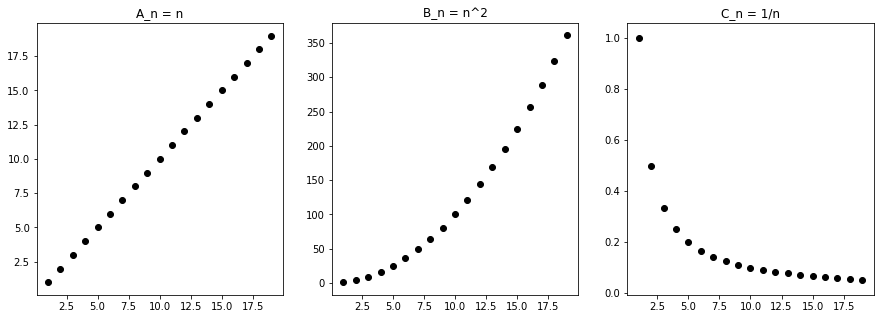

In [48]:
A = lambda n: n
B = lambda n: n**2
C = lambda n: 1/n

int_range = range(1,20)
f, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,5))
ax1.scatter(int_range, [A(n) for n in int_range], c="k")
ax1.set_title("A_n = n")
ax2.scatter(int_range, [B(n) for n in int_range], c="k")
ax2.set_title("B_n = n^2")
ax3.scatter(int_range, [C(n) for n in int_range], c="k")
ax3.set_title("C_n = 1/n")

# Limit of a sequence
A sequence $S$ is said to have a limit if $S_n$ gets arbitrarely close to a number as $n$ increases. This means that given any small difference $\epsilon$, we can always fing a big enough number $N$ such that all the entries of the sequence with index bigger than $N$ are closer to the limit than $\epsilon$. 

> The number $a$ is said to be the limit of the sequence $S$ if:
For all numbers $\epsilon$, there is an integer $N$ such that:
$$
 |a - S_n| < \epsilon
$$
>for all integers $n$ bigger than $N$.

In this case we write:

$$
\displaystyle\lim_{n \rightarrow \infty} S_n = a
$$

### Example 1
Considee the following sequence:
$$
C_n = \dfrac{1}{n}
$$
It is intuitively clear that the limit of $C_n$ is zero as $\frac{1}{n}$ becomes smaller and smaller as $n$ increases. 

Now let's try to prove this using the definition of limit. The definition says that for every possible value of $\epsilon$, there is always a integer $N_\epsilon$ such that the distance between $s_n$ and the limit $a$ is smaller than $\epsilon$ for all $n$ bigger than $N_\epsilon$.

Let's pick epsilon to be $0.2$, then we want to find a integer $N_{0.2}$ such that:
$$
s_n = \dfrac{1}{n} < 0.2
$$
for all integers $n$ bigger than $N_{0.1}$. It is easy to see that this is true when:
$$
N_{0.1} > \dfrac{1}{0.2} = 5.
$$
This is visualized in the following figure:

(1, 39)

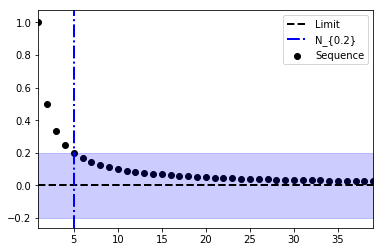

In [41]:
M = 40
int_range = range(1,M)
epsilon = 0.2
N = np.ceil(1/epsilon)
plt.scatter(int_range, [C(n) for n in int_range], c="k", label="Sequence")
plt.fill_between(int_range, -epsilon, epsilon, alpha = 0.2, color = "b")
plt.axhline(0, c = "k", lw = 2, ls = "--", label="Limit")
plt.axvline(N, lw = 2, ls = "-.", label="N_{0.2}", color = "b")
plt.legend(loc="upper right")
plt.xlim(1,M-1)

For any other possible value of $\epsilon$, we can always find a $N_\epsilon$ using the following formula:
    
$$
N_\epsilon = \Big\lceil \dfrac{1}{\epsilon} \Big\rceil
$$

where $\lceil \alpha \rceil$ denotes the smallest integer bigger than $\alpha$ (the so called ceiling of the number $\alpha$). The following figure visualizes $N_\epsilon$ for several values of $\epsilon$. 

(1, 39)

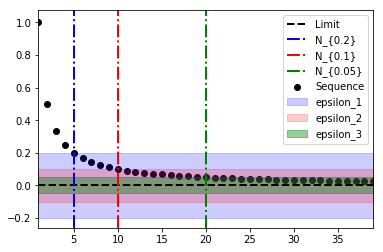

In [49]:
M = 40
int_range = range(1,M)
epsilon1 = 0.2
N1 = np.ceil(1/epsilon1)
epsilon2 = 0.1
N2 = np.ceil(1/epsilon2)
epsilon3 = 0.05
N3 = np.ceil(1/epsilon3)
plt.scatter(int_range, [C(n) for n in int_range], c="k", label="Sequence")
plt.fill_between(int_range, -epsilon1, epsilon1, alpha = 0.2, color = "b", label="epsilon_1")
plt.fill_between(int_range, -epsilon2, epsilon2, alpha = 0.2, color = "r", label="epsilon_2")
plt.fill_between(int_range, -epsilon3, epsilon3, alpha = 0.4, color = "g", label="epsilon_3")
plt.axhline(0, c = "k", lw = 2, ls = "--", label="Limit")
plt.axvline(N1, lw = 2, ls = "-.", label="N_{0.2}", color = "b")
plt.axvline(N2, lw = 2, ls = "-.", label="N_{0.1}", color = "r")
plt.axvline(N3, lw = 2, ls = "-.", label="N_{0.05}", color = "g")
plt.legend(loc="upper right")
plt.xlim(1,M-1)

### Example 2 (Oscillating sequence)
Consider the following sequence:
$$
D_n = \dfrac{(-1)^n}{n}
$$
This is very similar to the previous sequence except that the sign of the $n$-th element is positive when $n$ is even (since $(-1)^{2k} = 1$) and negative when $n$ is odd (since $(-1)^{2k + 1} = -1$).

Again, it is intuitive that the limit of this sequence is zero. The distance between the $n$-th element and its limit (zero) is:

$$
|s_n - 0| = \Big|\dfrac{(-1)^n}{n}\Big| = |(-1)^n|\cdot\Big|\dfrac{1}{n}\Big| = \dfrac{1}{n}
$$

This implies that we can use the same valus of $N_\epsilon$ that we found in the previous example in order to prove the existence of the limit. 

(1, 39)

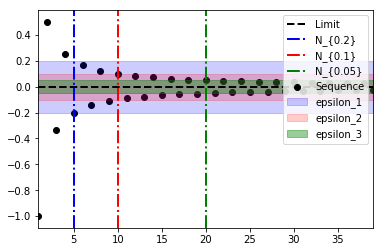

In [43]:
D = lambda n: (-1)**n/n

plt.scatter(int_range, [D(n) for n in int_range], c="k", label="Sequence")
plt.fill_between(int_range, -epsilon1, epsilon1, alpha = 0.2, color = "b", label="epsilon_1")
plt.fill_between(int_range, -epsilon2, epsilon2, alpha = 0.2, color = "r", label="epsilon_2")
plt.fill_between(int_range, -epsilon3, epsilon3, alpha = 0.4, color = "g", label="epsilon_3")
plt.axhline(0, c = "k", lw = 2, ls = "--", label="Limit")
plt.axvline(N1, lw = 2, ls = "-.", label="N_{0.2}", color = "b")
plt.axvline(N2, lw = 2, ls = "-.", label="N_{0.1}", color = "r")
plt.axvline(N3, lw = 2, ls = "-.", label="N_{0.05}", color = "g")
plt.legend(loc="upper right")
plt.xlim(1,M-1)

### Example 2 (Weird sequence)

A very counterintuitive property of sequences is that the behavior of any finite chank of it does not tell you anything about the limit. For example , consider the following (weird) sequence:
$$
\begin{equation}
  E_n=\begin{cases}
    \frac{n}{10}, & \text{if n<10}.\\
    \frac{1}{n}, & \text{otherwise}.
  \end{cases}
\end{equation}
$$

(1, 39)

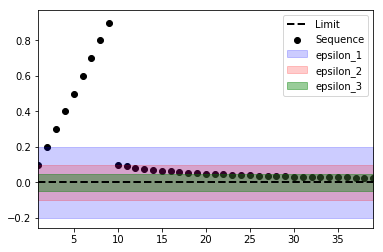

In [45]:
E = lambda n: n/10 if n<10 else 1/n

plt.scatter(int_range, [E(n) for n in int_range], c="k", label="Sequence")
plt.fill_between(int_range, -epsilon1, epsilon1, alpha = 0.2, color = "b", label="epsilon_1")
plt.fill_between(int_range, -epsilon2, epsilon2, alpha = 0.2, color = "r", label="epsilon_2")
plt.fill_between(int_range, -epsilon3, epsilon3, alpha = 0.4, color = "g", label="epsilon_3")
plt.axhline(0, c = "k", lw = 2, ls = "--", label="Limit")
plt.legend(loc="upper right")
plt.xlim(1,M-1)

In this example the first ten terms of the sequence seems to go to infinity but the following terms converge to zero. The take of message is: extrapolating from any finite number of terms of a sequence is a leap of faith!

### Exercise
prove that the limit of 

$$
S_n = \dfrac{1}{n^2}
$$ 

is zero. Specifically, for each $\epsilon$ find a integer $N_\epsilon$ such that for all $n > N_\epsilon$:
$$
\dfrac{1}{n^2} < \epsilon.
$$

## Algebra of sequences and limits

You can sum, subtract, multiply and divide sequences in the obvious (elementwise) way:

$$
\begin{aligned}
&(A + B)_n = A_n + B_n \\
&(A - B)_n = A_n - B_n \\
&(AB)_n = A_n B_n \\
&\Big(\dfrac{A}{B}\Big)_n = \dfrac{A_n}{B_n}
\end{aligned}
$$

If $A$ and $B$ with limits $a$ and $b$ respectively, we have the following relationships between sums, differences, products and fractions of sequences and their respective limits:

$$
\begin{aligned}
&\displaystyle\lim_{n \rightarrow \infty} (A + B)_n = \displaystyle\lim_{n \rightarrow \infty} A_n + \displaystyle\lim_{n \rightarrow \infty} B_n = a + b\\
&\displaystyle\lim_{n \rightarrow \infty} (A - B)_n = \displaystyle\lim_{n \rightarrow \infty} A_n - \displaystyle\lim_{n \rightarrow \infty} B_n = a - b \\
&\displaystyle\lim_{n \rightarrow \infty} (AB)_n = (\displaystyle\lim_{n \rightarrow \infty} A_n)(\displaystyle\lim_{n \rightarrow \infty}  B_n) = a b \\
&\displaystyle\lim_{n \rightarrow \infty} \Big(\dfrac{A}{B}\Big)_n = \dfrac{\displaystyle\lim_{n \rightarrow \infty}  A_n}{\displaystyle\lim_{n \rightarrow \infty}  B_n} = \dfrac{a}{b}
\end{aligned}
$$

### Bonus exercise

Prove these relations using the definition of limit.

## Asymptitic relations

Asymptotic sequences have a very similar behavior when $n$ is very large. Two sequences $A$ and $B$ are said to be asymptotic when:
$$
\displaystyle\lim_{n \rightarrow \infty} \frac{A_n}{B_n} = 1
$$
In this case, we write:
$$
A \sim B
$$
Note that if $A$ and $B$ are asymptotic and have limits a and b respectively then $a = b$ since:
$$
\displaystyle\lim_{n \rightarrow \infty} \dfrac{A_n}{B_n} =  \dfrac{\displaystyle\lim_{n \rightarrow \infty} A_n}{\displaystyle\lim_{n \rightarrow \infty} B_n} = \dfrac{a}{b}
$$
which is equal to one only if $a = b$.

However, two sequences can be asymptotic even if they do not have a limit. For example, consider the two following sequences:
$$
\begin{aligned}
&A_n = 2n + n^2 \\
&B_n = n^2
\end{aligned}
$$
Let's consider the limit of their ratio:
$$
\displaystyle\lim_{n \rightarrow \infty} \dfrac{A_n}{B_n} = \displaystyle\lim_{n \rightarrow \infty}\dfrac{2n + n^2}{n^2} = \displaystyle\lim_{n \rightarrow \infty}\dfrac{2n}{n^2} + \displaystyle\lim_{n \rightarrow \infty}\dfrac{n^2}{n^2} = 2 \displaystyle\lim_{n \rightarrow \infty}\dfrac{1}{n} + \displaystyle\lim_{n \rightarrow \infty} 1 = 0 + 1 = 1
$$
since we know that $\frac{1}{n}$ tends to zero. Therefore, $A_n$ and $B_n$ are asymptotic.

### Limits of ratios
Asymptotic relations are very useful for computing limits of ratios of sequences. 
In fact, if $A \sim C$ and $B \sim D$ we have that:
$$
\displaystyle\lim_{n \rightarrow \infty} \dfrac{A_n}{B_n} = \displaystyle\lim_{n \rightarrow \infty} \dfrac{C_n}{D_n}
$$
This is useful because $C$ and $D$ can be much simpler than $A$ and $B$. Consider the following limit:
$$
\displaystyle\lim_{n \rightarrow \infty} \dfrac{A_n}{B_n}
$$
where
$$
\begin{aligned}
&A_n = 3 + n + 4n^2\\
&B_n = 1 + n^2
\end{aligned}
$$
Using the same computations we did in the previous section, we can see that:
$$
\begin{aligned}
&A_n \sim C_n = 4 n^4
&B_n \sim D_n = n^2
\end{aligned}
$$
Therefore:
$$
\displaystyle\lim_{n \rightarrow \infty} \dfrac{A_n}{B_n} = \displaystyle\lim_{n \rightarrow \infty} \dfrac{3 + n + 4n^2}{1 + n^2} = \displaystyle\lim_{n \rightarrow \infty} \dfrac{C_n}{D_n}= \displaystyle\lim_{n \rightarrow \infty} \dfrac{4n^2}{n^2} = 4
$$

## Exercises

Which of the following sequences have a limit?

Find the limit of the following sequences (I suggest to use both python and some theoretical arguments):

- $A_n = \dfrac{1}{n}$
- $B_n = 2 + 1/n^2$
- $C_n = 1 + 3/n^2$
- $D_n = \dfrac{1 + (2 - 1)}{n^2}$
- $E_n = (0.5)^n$
- $F_n = 0.1 + (0.6)^n$
- $G_n = \dfrac{(1 + n + 2n^2)}{(4n - n^2)}$
- $H_n = \dfrac{(1 + n^2)}{n^4} + \dfrac{(1 + 3 n^3)}{(2 + 3n + 2 n^3)}$

## Finite and infinite sums

### Finite sums
We deal with finite sums since primary school, Some examples:
- 1 + 1 = 2
- 2 + 2 + 2 + 2 = 8
It is convenient to have a symbol denoting a sum of a lot of terms:
$$
\displaystyle\sum_{n=0}^N a_n = a_0 + a_1 + \dots + a_N
$$

#### The geometric sum
The geometric sum is one of the most important example. It is defined as follows:
$$
S(r,N) = \displaystyle\sum_{n=0}^N r^n
$$
In this case, we can actually find a simple formula for the sum. The trick is to subtract two geometric sums one of which has been "shifted" by multipling with $r$. The result is that all but two of the terms in the series cancel out:
$$
\begin{aligned}
 \color{red}{S(r,N)} -  \color{blue} {r S(r,N)} &=  \color{red}{(r^0 + r^1 + r^2 + \ldots + r^N)} - \color{blue}{(r^1 + r^2 + r^3 + \dots +r^{N+1})} \\
&= \color{red}{r^0} + (\color{red}{r^1} - \color{blue}{r^1}) + (\color{red}{r^2} - \color{blue}{r^2}) + \ldots - \color{blue}{r^{N+1}} \\
&= \color{red}{r^0} - \color{blue}{r^{N+1}} \\
&= 1 - r^{N+1}
\end{aligned}
$$
Therefore, we got the following algebraic equation:
$$
S(r,N) - r S(r,N) = 1 - r^{N+1} 
$$
which can be easily solved giving us a formula for the geometric sum:
$$
S(r,N) = \dfrac{1 - r^{N+1}}{1 - r}
$$


### Infinite sums
An infinite sum is defined as the limit of a sequence of partial sums:

$$
\displaystyle\sum_{n=0}^\infty a_n = \displaystyle\lim_{N \rightarrow \infty} \sum_{n=0}^N a_n
$$

In other wods, the infiniote sum is the limit of the following infinite sequence of partial sums):
$$
S = a_0, a_0 + a_1, a_0 + a_1 + a_2, \ldots , \sum_n^N a_n, \dots
$$
Note that the limit does not always exist, in that case the infinite sum is said to be DIVERGENT. Conversely, if the sequence of partial sums has a limit the series is said to be CONVERGENT.

Note that a series can be convergent only if the sequence of terms $a_n$ has zero as a limit ($a_n$ gets smaller and smaller). However, a series can be divergence even if $a_n$ goes to zero. For example, the following (harmonic) series is divergent:
$$
\displaystyle\lim_{N \rightarrow \infty} \displaystyle\sum_{n=1}^N \dfrac{1}{n} = \infty
$$

#### Example 1 (Infinite geometric sum with 0 < r < 1)
The infinite geometric sum:
$$
S(r,\infty) = \displaystyle\sum_{n=0}^\infty r^n
$$
Using our previous formula for the finite geometric sum, we get:
$$
S(r,\infty) = \displaystyle\lim_{N \rightarrow \infty} S(r,N) =\displaystyle\lim_{N \rightarrow \infty} \dfrac{1 - r^{N+1}}{1 - r}
$$
We can compute this limit using our previous results on the limit of sums and product of sequences:
$$
\displaystyle\lim_{N \rightarrow \infty} \dfrac{1 - r^{N+1}}{1 - r} = \displaystyle\lim_{N \rightarrow \infty} \left( \dfrac{1}{1 - r} - \dfrac{r^{N+1}}{1 - r} \right) = \dfrac{1}{1 - r} + \dfrac{1}{1 - r} \displaystyle\lim_{N \rightarrow \infty} r^{N+1}
$$
The term
$$
r^{N+1} = r \cdot r \cdot \ldots \cdot r \quad (n \enspace \text{times})
$$
grows bigger and bigger if the absolute value of $r$ is bigger than $1$, while it shrinks to zero if it is smaller than one. In this latter case we get:
$$
S(r,\infty) = \dfrac{1}{1 - r} - \dfrac{1}{1 - r} \displaystyle\lim_{N \rightarrow \infty} r^{N+1} = \dfrac{1}{1 - r} - 0 =  \dfrac{1}{1 - r}
$$

(1, 39)

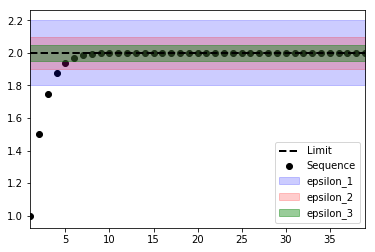

In [9]:
r = 0.5
S = lambda N: sum([r**n for n in range(N)])

plt.scatter(int_range, [S(n) for n in int_range], c="k", label="Sequence")
limit = 1/(1 - r)
plt.fill_between(int_range, limit-epsilon1, limit+epsilon1, alpha = 0.2, color = "b", label="epsilon_1")
plt.fill_between(int_range, limit-epsilon2, limit+epsilon2, alpha = 0.2, color = "r", label="epsilon_2")
plt.fill_between(int_range, limit-epsilon3, limit+epsilon3, alpha = 0.4, color = "g", label="epsilon_3")
plt.axhline(limit, c = "k", lw = 2, ls = "--", label="Limit")
plt.legend(loc="lower right")
plt.xlim(1,M-1)

As you can se the series gets very close to its limit very quickly!

### Exercise

Prove that the limit of $r^n$ is zero if $0 < r < 1$. In particular, for all $\epsilon$ find a integer $N_\epsilon$ such that for all $n > N_\epsilon$:
$$
r^n < \epsilon
$$
Hint: you need to use a logarithm. 

#### Example 2 (Infinite geometric sum with -1 < r < 0)

When r is bewteen -1 and 0, the infinite geometric series converges in an alternating manner:

(1, 39)

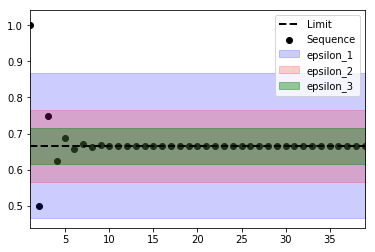

In [13]:
r = -0.5
S = lambda N: sum([r**n for n in range(N)])

plt.scatter(int_range, [S(n) for n in int_range], c="k", label="Sequence")
limit = 1/(1 - r)
plt.fill_between(int_range, limit-epsilon1, limit+epsilon1, alpha = 0.2, color = "b", label="epsilon_1")
plt.fill_between(int_range, limit-epsilon2, limit+epsilon2, alpha = 0.2, color = "r", label="epsilon_2")
plt.fill_between(int_range, limit-epsilon3, limit+epsilon3, alpha = 0.4, color = "g", label="epsilon_3")
plt.axhline(limit, c = "k", lw = 2, ls = "--", label="Limit")
plt.legend(loc="upper right")
plt.xlim(1,M-1)

#### Example 3 (Infinite geometric sum with r = -1)

In this case the series keep oscillating between -1 an d one and therefore it does not converge to any limit.

(1, 39)

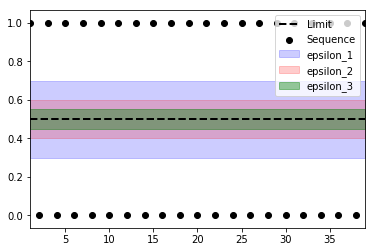

In [16]:
r = -1
S = lambda N: sum([r**n for n in range(N)])

plt.scatter(int_range, [S(n) for n in int_range], c="k", label="Sequence")
limit = 1/(1 - r)
plt.fill_between(int_range, limit-epsilon1, limit+epsilon1, alpha = 0.2, color = "b", label="epsilon_1")
plt.fill_between(int_range, limit-epsilon2, limit+epsilon2, alpha = 0.2, color = "r", label="epsilon_2")
plt.fill_between(int_range, limit-epsilon3, limit+epsilon3, alpha = 0.4, color = "g", label="epsilon_3")
plt.axhline(limit, c = "k", lw = 2, ls = "--", label="Limit")
plt.legend(loc="upper right")
plt.xlim(1,M-1)

Note that our formula gives $\frac{1}{(1 - (-1))} = \frac{1}{2}$ but the series definitly does not converge to this number! However, there is a deep connection between $\frac{1}{2}$ and this series. This will become clear to you if you will delve deeper into mathematics (but not in this course!)

#### Example 4 (Infinite geometric sum with r > 1)

If r is bigger the one, the partial sum becomes bigger and bigger and the series does not converge!

(1, 39)

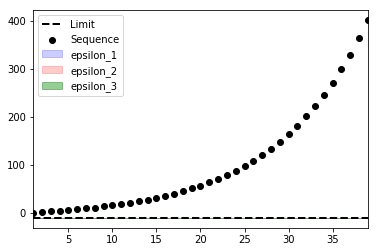

In [18]:
r = 1.1
S = lambda N: sum([r**n for n in range(N)])

plt.scatter(int_range, [S(n) for n in int_range], c="k", label="Sequence")
limit = 1/(1 - r)
plt.fill_between(int_range, limit-epsilon1, limit+epsilon1, alpha = 0.2, color = "b", label="epsilon_1")
plt.fill_between(int_range, limit-epsilon2, limit+epsilon2, alpha = 0.2, color = "r", label="epsilon_2")
plt.fill_between(int_range, limit-epsilon3, limit+epsilon3, alpha = 0.4, color = "g", label="epsilon_3")
plt.axhline(limit, c = "k", lw = 2, ls = "--", label="Limit")
plt.legend(loc="upper left")
plt.xlim(1,M-1)

## Exercises

Find out if the following series are convergent and in that case find their value.

- $\displaystyle\sum_n^\infty (0.6)^n$
- $\displaystyle\sum_n^\infty 4 \cdot (0.2)^n$
- $\displaystyle\sum_n^\infty 0.1 \cdot (-1.2)^n$

## Bonus exercise (More difficult!)

Show that the following (harminic) series does not converge:

$$
\displaystyle\sum_{n=1}^\infty \dfrac{1}{n}
$$

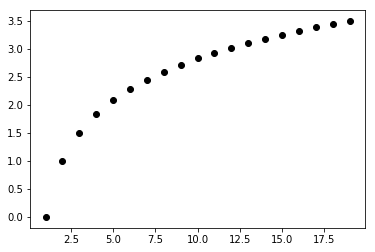

In [28]:
S = lambda N: sum([1/n for n in range(1, N)])

plt.scatter(int_range, [S(n) for n in int_range], c="k", label="Sequence")